In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_df = pd.read_csv('../data/clean/weather_countries_clean.csv')

In [3]:
#weather_df

In [4]:
weather_df = weather_df.drop(columns=["Year"])

In [5]:
#weather_df 

In [6]:
weather_df.columns = weather_df .columns.str.lower().str.replace(' ', '_')
weather_df 

,country,city,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,Argentina,Buenos Aires,24.9,23.6,21.9,17.9,14.5,11.7,11.0,12.8,14.6,17.9,20.7,23.3
1,Colombia,Bogotá,14.3,14.5,14.9,14.9,15.0,14.5,14.6,14.1,14.3,14.3,14.4,14.6
2,Estonia,Tallinn,-2.9,-3.6,-0.6,4.8,10.2,14.5,17.6,16.5,12.0,6.5,2.0,-0.9
3,Georgia,Tbilisi,1.2,2.7,6.6,12.2,17.4,21.3,24.5,24.1,19.6,13.7,7.8,3.2
4,Mexico,Mexico City,14.6,15.9,18.1,19.6,20.0,19.4,18.2,18.3,18.0,17.1,16.3,15.0
5,Philippines,Manila,26.7,27.4,28.7,30.1,30.0,29.3,28.5,28.3,28.4,28.4,28.0,27.0
6,Portugal,Lisbon,11.6,12.7,14.9,15.9,18.0,21.2,23.1,23.5,22.1,18.8,15.0,12.4
7,Serbia,Belgrade,1.4,3.1,7.6,12.9,18.1,21.0,23.0,22.7,18.0,12.9,7.1,2.7
8,Spain,Madrid,6.3,7.9,11.2,12.9,16.7,22.2,25.6,25.1,20.9,15.1,9.9,6.9
9,Thailand,Bangkok,27.0,28.3,29.5,30.5,29.9,29.5,29.0,28.8,28.3,28.1,27.8,26.5


# Heatmap

In [8]:
weather_df.columns

Index(['country', 'city', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec'],
      dtype='object')

In [9]:
months = ['country', 'city', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec']

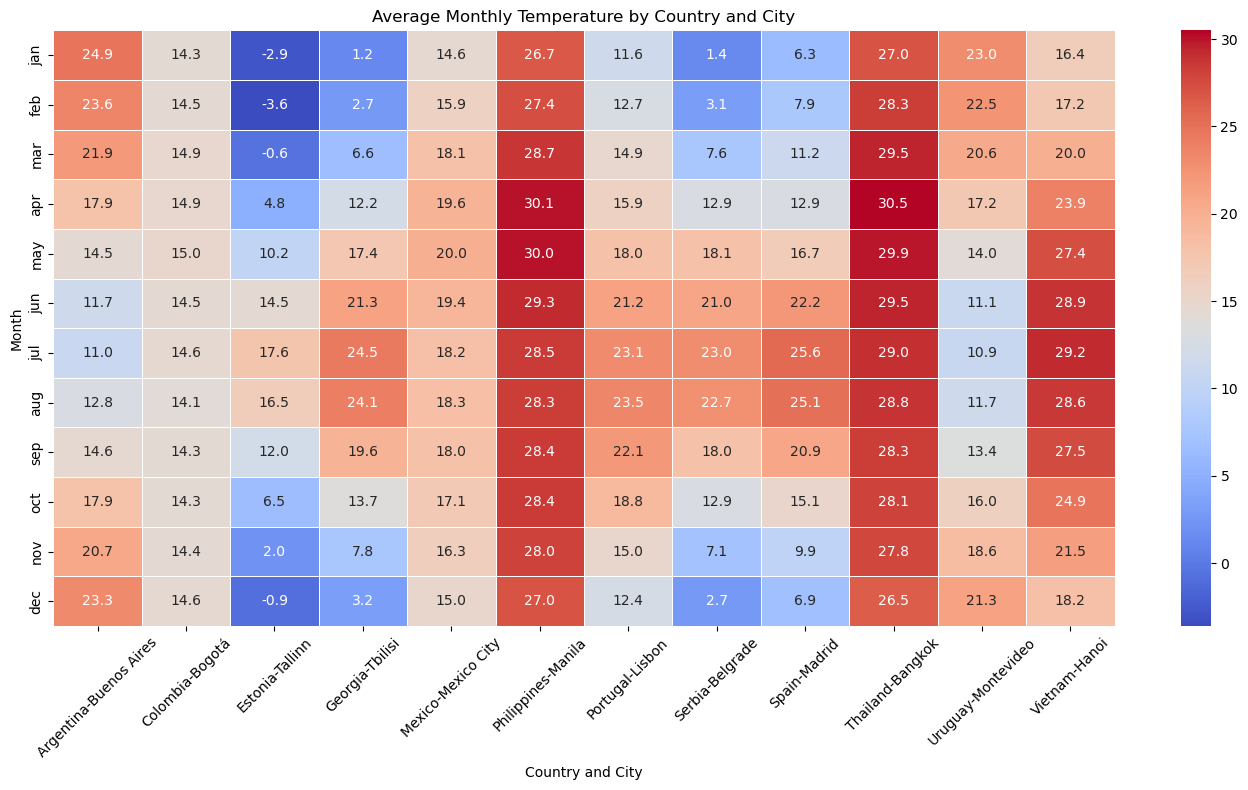

In [10]:

weather_df_heatmap = weather_df.set_index(['country', 'city']) 

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(weather_df_heatmap.T, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Average Monthly Temperature by Country and City')
plt.xlabel('Country and City')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()

#save 
plt.savefig('../Visualisations/weather_heathmap.png', bbox_inches='tight', dpi=80)
plt.show()


# Boxplot temperature distribution

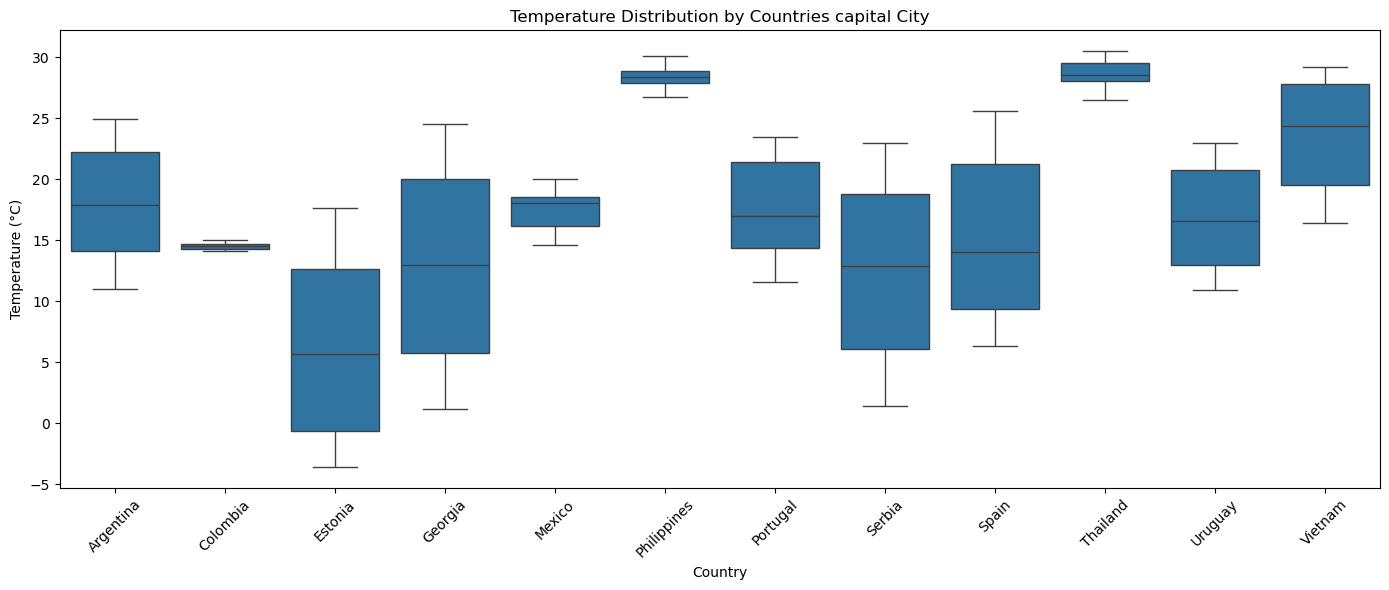

In [12]:

weather_df_long = pd.melt(weather_df, id_vars=['country', 'city'], value_vars=months, var_name='Month', value_name='Temperature')


plt.figure(figsize=(14, 6))
sns.boxplot(x='country', y='Temperature', data=weather_df_long)
plt.title('Temperature Distribution by Countries capital City')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Temperature (°C)')
plt.tight_layout()

#save
plt.savefig('../Visualisations/Temperature_distribution.png', bbox_inches='tight', dpi=300)
plt.show()


# Monthly temperature by Cities

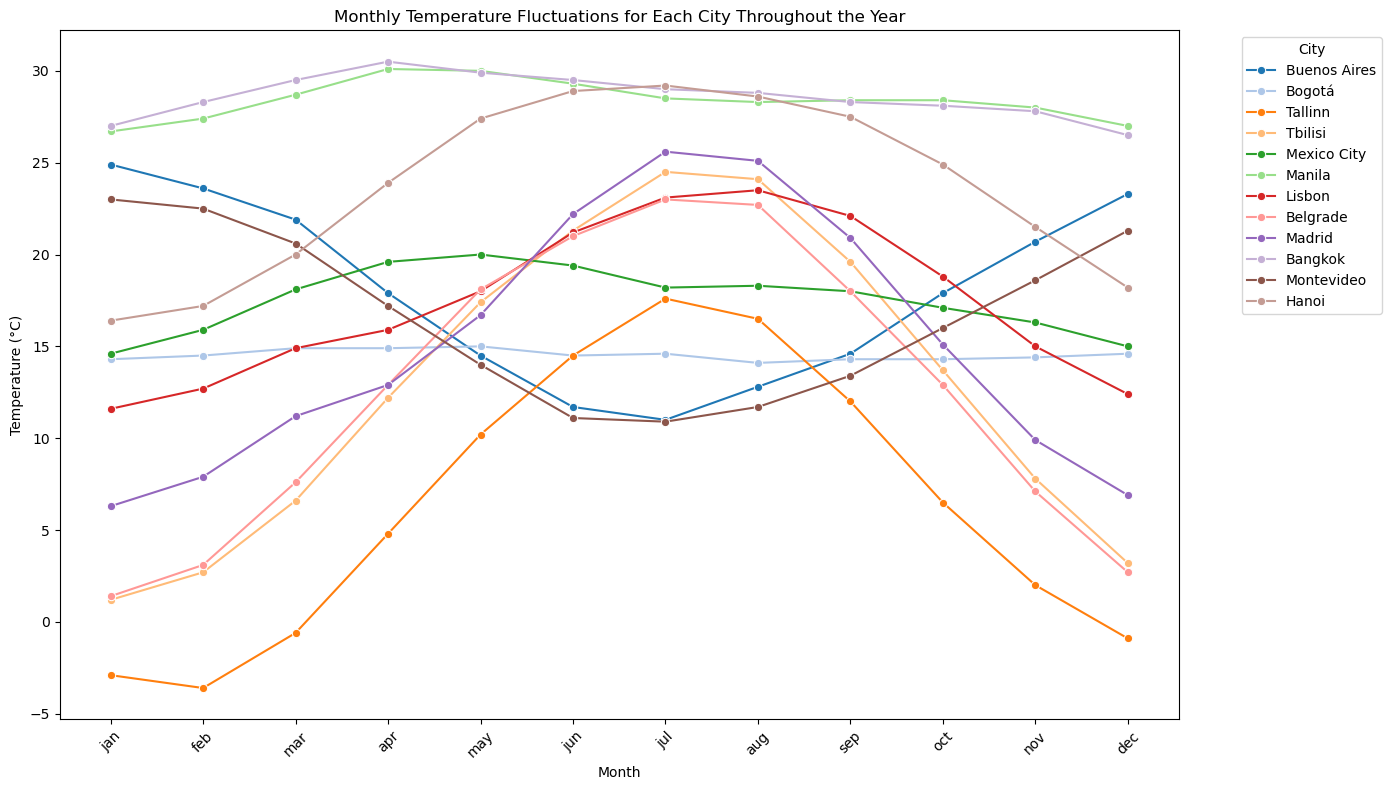

In [14]:
#months = ['country', 'city', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       #'aug', 'sep', 'oct', 'nov', 'dec']

# Melt the dataframe to make it long format for easy plotting
weather_df_long = pd.melt(weather_df, id_vars=['country', 'city'], value_vars=months,
                          var_name='Month', value_name='Temperature')


plt.figure(figsize=(14, 8))


sns.lineplot(x='Month', y='Temperature', data=weather_df_long, hue='city', marker='o', palette='tab20')


plt.title('Monthly Temperature Fluctuations for Each City Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

# save
plt.tight_layout()
plt.savefig('../Visualisations/monthly_temperature_cities.png', bbox_inches='tight', dpi=100)
plt.show()

# Average temperature by Country¶

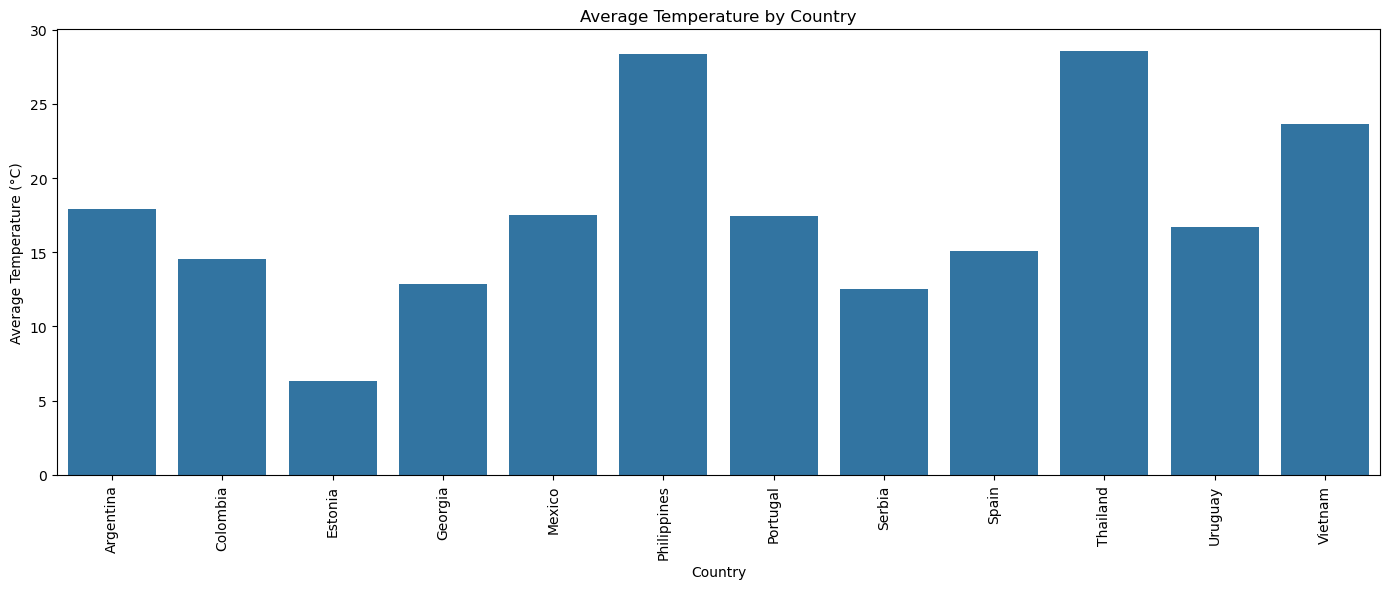

In [16]:
# Calculate average temperature across all months for each country
month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec']

weather_df['avg_temperature'] = weather_df[month].mean(axis=1)


plt.figure(figsize=(14, 6))
sns.barplot(x='country', y='avg_temperature', data=weather_df)
plt.title('Average Temperature by Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()

#save
plt.savefig('../Visualisations/Average_Temperatur.png', bbox_inches='tight', dpi=100)
plt.show()
